<h1>
En álgebra lineal, la descomposición en valores singulares (SVD) es una factorización de una matriz 
real o compleja. Generaliza la descomposición propia de una matriz normal cuadrada con una base propia 
ortonormal a cualquier matriz  m x n. Está relacionado con la descomposición polar.
<h1/>


In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.image import imread

In [6]:
def svd_2( matriz ):
	n = len( matriz )
	plt.imshow( matriz , cmap="gray" )
	plt.title( "Imagen original ")
	plt.show()

	U,S,V = np.linalg.svd( matriz )

	imagenes = []
	for i in range(n):
	    imagenes.append( S[i]*np.outer(U[:,i],V[i]) )

	imagenes_combinadas = []
	for i in range(n):
	    imagen = sum(imagenes[:i+1])
	    imagenes_combinadas.append(imagen)
	    
	fig, axes = plt.subplots(figsize = (16,8), nrows = 1, ncols = n, sharex=True, sharey=True)
	for num, ax in zip(range(n), axes):
	    ax.imshow(imagenes[num], cmap='gray', vmin=0, vmax=1)
	    ax.set_title(np.round(S[num],2), fontsize=10)
	plt.show()

	fig, axes = plt.subplots(figsize = (16,8), nrows = 1, ncols = n, sharex=True, sharey=True)
	for num, ax in zip(range(n), axes):
	    ax.imshow(imagenes_combinadas[num], cmap='gray', vmin=0, vmax=1)
	plt.show()

	return U,S,V


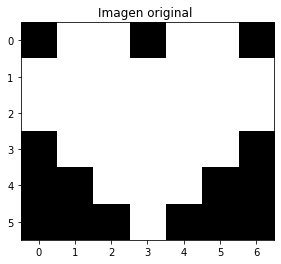

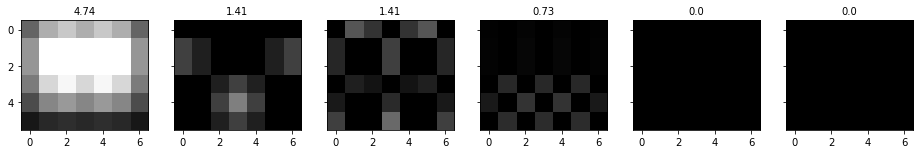

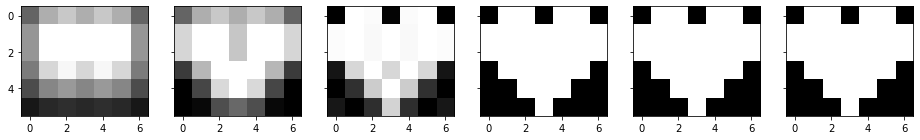

In [7]:
matriz = np.array([[0,1,1,0,1,1,0],
              [1,1,1,1,1,1,1],
              [1,1,1,1,1,1,1],
              [0,1,1,1,1,1,0],
              [0,0,1,1,1,0,0],
              [0,0,0,1,0,0,0],
             ])

U,S,V = svd_2(matriz)


In [2]:
def descomposicionValoresSingulares ( imagen ):

	imagenEscalasGrises = np.mean( imagen , -1)
	print(imagen.shape)
	print(imagenEscalasGrises.shape)

	plt.imshow( imagen )
	plt.title( "Imagen original ")
	plt.show()

	plt.imshow( imagenEscalasGrises )
	plt.set_cmap('gray')
	plt.title( "Imagen en escala de grises ")
	plt.show()


	# Numpy nos ayuda con el método que descompone la matriz en las matrices U, S, V de la descomposicion de valores sigualres.
	U,S,V = np.linalg.svd( imagenEscalasGrises, full_matrices = False )
	S_D = np.diag( S )

	#Mostrar las imagenes después de la reducción.
	j = 0
	for r in (5, 20, 50):
	    # Reconstruirt la imagen con 5 columnas, 20 y 100.
	    Xaproximada = U[:,:r] @ S_D[0:r,:r] @ V[:r,:]
	    plt.figure(j+1)
	    j += 1
	    img = plt.imshow(Xaproximada)
	    img.set_cmap('gray')
	    plt.axis('off')
	    plt.title('r = ' + str(r))
	    plt.show()

(314, 160, 3)
(314, 160)


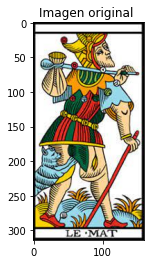

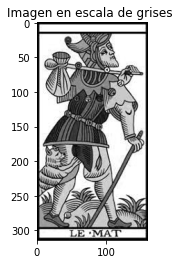

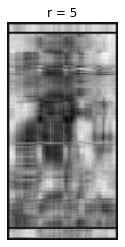

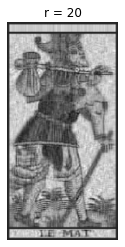

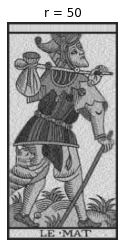

In [3]:
imagen = imread( "lemat.jpg")
descomposicionValoresSingulares( imagen )